<a href="https://colab.research.google.com/github/Adarsh-Vemali/AMEX_comp/blob/main/AMEX_productionised_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Amex_comp/Training_Data.csv')
dftest = pd.read_csv('/content/drive/My Drive/Amex_comp/Evaluation_Data.csv')

In [ ]:
df = df[0:19595]

In [ ]:
df["acq_sub_chn"].fillna('Unknown', inplace = True) 
df["acq_type_grp"].fillna('Unknown', inplace = True) 
dftest["acq_sub_chn"].fillna('Unknown', inplace = True) 
dftest["acq_type_grp"].fillna('Unknown', inplace = True) 

In [ ]:
l=list(df.columns)
for col in l:
  df[col].fillna(0, inplace = True)

l=list(dftest.columns)
for col in l:
  dftest[col].fillna(0, inplace = True)

In [ ]:
col='acq_sub_chn'
df[col] = df[col].astype('category')
dftest[col] = dftest[col].astype('category')

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder() 
df['fee_type_grp'] = labelencoder.fit_transform(df['fee_type_grp'])
dftest['fee_type_grp'] = labelencoder.fit_transform(dftest['fee_type_grp'])
labelencoder = LabelEncoder() 
df['acq_type_grp'] = labelencoder.fit_transform(df['acq_type_grp'])
dftest['acq_type_grp'] = labelencoder.fit_transform(dftest['acq_type_grp'])
labelencoder = LabelEncoder() 
df['acq_sub_chn'] = labelencoder.fit_transform(df['acq_sub_chn'])
dftest['acq_sub_chn'] = labelencoder.fit_transform(dftest['acq_sub_chn'])
df.head()

,cust_id,profitable_flag,count_accts,cm_age,flag_top_ed_spender,flag_cust_fee_paid_6m,pre6m_cust_spend,pre6m_cust_roc_cnt,pre6m_cust_non_disc_amt,pre6m_cust_non_disc_cnt,pre6m_cust_disc_amt,pre6m_cust_disc_cnt,pre6m_cust_outbound_amt,pre6m_cust_online_amt,pre6m_cust_online_cnt,pre6m_cust_travel_amt,pre6m_cust_travel_cnt,pre6m_cust_retail_amt,pre6m_cust_retail_cnt,pre6m_cust_myca_active,pre6m_cust_mob_logins,pre6m_total_mc_trs,acq_sub_chn,acq_type_grp,fee_type_grp,Cust_tenure,pre6m_spend_active_ind,highly_utilized_ind,min_pay_ind,paid_in_full_ind,sum_total_line_amt,direct_debit_ind,referrals,spillover,self_accts,Customer Low Quality indicator,cdss_most_rcnt_prob,cust_max_credit_12m_amt,cust_max_remit_12m_amt,cbr_3_score,cnsumr_chrg_actv_cust_cnt,cnsumr_chrg_avg_credit_12m_amt,cnsumr_lend_actv_cust_cnt,cnsumr_lend_tot_util_ratio,sow_revol_avg_paydown_pct,sow_tot_annual_ext_pmt_amt,sow_tot_revol_bal_amt,sow_tot_revol_cnt,sow_tot_trans_bal_amt,sow_tot_trans_cnt,pos_neg
0,555488,1,1,90,0.0,0.0,3696.00,260.0,2236.00,202.0,1461.00,58.0,149.00,253.00,36.0,70.00,8.0,2975.00,224.0,9.0,54.0,25.0,8,1,0,11.0,1.0,1.0,0.0,0.0,6000.00,0.0,0.0,0.0,0.0,0.0,0.00,859.00,792.00,1300.0,0.0,-,1.0,0.08,0.00,-,-,0.0,-,0.0,1
1,550513,1,2,89,1.0,0.0,4440.00,676.0,346.00,158.0,4095.00,518.0,57.00,2166.00,56.0,2690.00,272.0,580.00,184.0,0.0,0.0,77.0,17,3,1,213.0,1.0,1.0,0.0,0.0,39600.00,0.0,2.0,0.0,0.0,0.0,0.00,814.00,800.00,947.0,0.0,-,2.0,0.35,0.04,5269.00,4044.00,6.0,-,2.0,1
2,551684,1,1,88,1.0,0.0,7879.00,382.0,1848.00,184.0,6032.00,198.0,2852.00,2658.00,304.0,4232.00,30.0,1958.00,198.0,9.0,32.0,48.0,24,0,0,139.0,1.0,0.0,0.0,1.0,92400.00,1.0,0.0,0.0,0.0,0.0,0.00,2478.00,2467.00,1357.0,0.0,-,1.0,0.10,0.00,12783.00,-,0.0,409.00,2.0,1
3,550421,1,3,86,1.0,0.0,11988.00,1296.0,4431.00,220.0,7558.00,1076.0,997.00,5254.00,340.0,1504.00,70.0,5853.00,248.0,21.0,969.0,63.0,25,3,1,96.0,1.0,1.0,1.0,1.0,38667.00,1.0,0.0,0.0,0.0,0.0,0.03,2620.00,2523.00,1239.0,1.0,883.00,2.0,0.97,0.00,-,-,0.0,-,0.0,1
4,563825,1,1,86,0.0,1.0,5712.00,214.0,1231.00,86.0,4481.00,128.0,798.00,4154.00,216.0,2751.00,22.0,1598.00,142.0,9.0,34.0,5.0,17,1,0,39.0,1.0,0.0,0.0,1.0,50800.00,1.0,0.0,0.0,0.0,0.0,0.00,1690.00,1690.00,1255.0,0.0,-,1.0,0.41,0.00,-,-,0.0,-,0.0,1


cust_id                           0.002040
profitable_flag                   1.000000
count_accts                      -0.018371
cm_age                           -0.009669
flag_top_ed_spender               0.045787
flag_cust_fee_paid_6m            -0.014153
pre6m_cust_roc_cnt                0.096348
pre6m_cust_non_disc_cnt           0.077625
pre6m_cust_disc_cnt               0.087323
pre6m_cust_online_cnt             0.043151
pre6m_cust_travel_cnt             0.112781
pre6m_cust_retail_cnt             0.045425
pre6m_cust_myca_active            0.017608
pre6m_cust_mob_logins            -0.005772
pre6m_total_mc_trs                0.078756
acq_sub_chn                       0.005866
acq_type_grp                     -0.009071
fee_type_grp                      0.036341
Cust_tenure                       0.027501
pre6m_spend_active_ind            0.043024
highly_utilized_ind               0.002430
min_pay_ind                      -0.026498
paid_in_full_ind                  0.016358
direct_debi

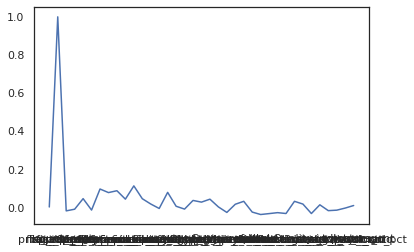

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")

corr = df.corr()['profitable_flag']
print(corr)
plt.plot(corr)

In [ ]:
for i in range(len(df)):
  for col in df.columns:
    if str(df[col][i]).strip()=='-':
      df[col][i]=0 
columns_for_all = list(df.columns)
for i in range(len(dftest)):
  for col in dftest.columns:
    if str(dftest[col][i]).strip()=='-':
      dftest[col][i]=0 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
df.head()

,cust_id,profitable_flag,count_accts,cm_age,flag_top_ed_spender,flag_cust_fee_paid_6m,pre6m_cust_spend,pre6m_cust_roc_cnt,pre6m_cust_non_disc_amt,pre6m_cust_non_disc_cnt,pre6m_cust_disc_amt,pre6m_cust_disc_cnt,pre6m_cust_outbound_amt,pre6m_cust_online_amt,pre6m_cust_online_cnt,pre6m_cust_travel_amt,pre6m_cust_travel_cnt,pre6m_cust_retail_amt,pre6m_cust_retail_cnt,pre6m_cust_myca_active,pre6m_cust_mob_logins,pre6m_total_mc_trs,acq_sub_chn,acq_type_grp,fee_type_grp,Cust_tenure,pre6m_spend_active_ind,highly_utilized_ind,min_pay_ind,paid_in_full_ind,sum_total_line_amt,direct_debit_ind,referrals,spillover,self_accts,Customer Low Quality indicator,cdss_most_rcnt_prob,cust_max_credit_12m_amt,cust_max_remit_12m_amt,cbr_3_score,cnsumr_chrg_actv_cust_cnt,cnsumr_chrg_avg_credit_12m_amt,cnsumr_lend_actv_cust_cnt,cnsumr_lend_tot_util_ratio,sow_revol_avg_paydown_pct,sow_tot_annual_ext_pmt_amt,sow_tot_revol_bal_amt,sow_tot_revol_cnt,sow_tot_trans_bal_amt,sow_tot_trans_cnt,pos_neg
0,555488,1,1,90,0.0,0.0,3696.00,260.0,2236.00,202.0,1461.00,58.0,149.00,253.00,36.0,70.00,8.0,2975.00,224.0,9.0,54.0,25.0,8,1,0,11.0,1.0,1.0,0.0,0.0,6000.00,0.0,0.0,0.0,0.0,0.0,0.00,859.00,792.00,1300.0,0.0,0,1.0,0.08,0.00,0,0,0.0,0,0.0,1
1,550513,1,2,89,1.0,0.0,4440.00,676.0,346.00,158.0,4095.00,518.0,57.00,2166.00,56.0,2690.00,272.0,580.00,184.0,0.0,0.0,77.0,17,3,1,213.0,1.0,1.0,0.0,0.0,39600.00,0.0,2.0,0.0,0.0,0.0,0.00,814.00,800.00,947.0,0.0,0,2.0,0.35,0.04,5269.00,4044.00,6.0,0,2.0,1
2,551684,1,1,88,1.0,0.0,7879.00,382.0,1848.00,184.0,6032.00,198.0,2852.00,2658.00,304.0,4232.00,30.0,1958.00,198.0,9.0,32.0,48.0,24,0,0,139.0,1.0,0.0,0.0,1.0,92400.00,1.0,0.0,0.0,0.0,0.0,0.00,2478.00,2467.00,1357.0,0.0,0,1.0,0.10,0.00,12783.00,0,0.0,409.00,2.0,1
3,550421,1,3,86,1.0,0.0,11988.00,1296.0,4431.00,220.0,7558.00,1076.0,997.00,5254.00,340.0,1504.00,70.0,5853.00,248.0,21.0,969.0,63.0,25,3,1,96.0,1.0,1.0,1.0,1.0,38667.00,1.0,0.0,0.0,0.0,0.0,0.03,2620.00,2523.00,1239.0,1.0,883.00,2.0,0.97,0.00,0,0,0.0,0,0.0,1
4,563825,1,1,86,0.0,1.0,5712.00,214.0,1231.00,86.0,4481.00,128.0,798.00,4154.00,216.0,2751.00,22.0,1598.00,142.0,9.0,34.0,5.0,17,1,0,39.0,1.0,0.0,0.0,1.0,50800.00,1.0,0.0,0.0,0.0,0.0,0.00,1690.00,1690.00,1255.0,0.0,0,1.0,0.41,0.00,0,0,0.0,0,0.0,1


In [ ]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

y = df.iloc[:, 1]
X = sklearn.preprocessing.MinMaxScaler().fit_transform(df)
df1 = sklearn.preprocessing.MinMaxScaler().fit_transform(df)
df1 = pd.DataFrame(df1)
X = X[:, 2:]

bestfeatures = SelectKBest(score_func=chi2, k=49)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df.iloc[:,2:].columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature column','Score']  
pdf=(featureScores.nlargest(49,'Score'))
pdf = pdf.reset_index()
pdf

,index,Feature column,Score
0,14,pre6m_cust_travel_cnt,22.629876
1,2,flag_top_ed_spender,19.324681
2,33,Customer Low Quality indicator,14.949132
3,26,min_pay_ind,13.462586
4,7,pre6m_cust_non_disc_cnt,12.236993
5,35,cust_max_credit_12m_amt,10.866517
6,36,cust_max_remit_12m_amt,10.757942
7,29,direct_debit_ind,10.444271
8,39,cnsumr_chrg_avg_credit_12m_amt,8.132988
9,6,pre6m_cust_non_disc_amt,5.986160


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import numpy as np
from sklearn.linear_model import LinearRegression
RANDOM_SEED=42
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn_pandas import DataFrameMapper

cuda:0


In [ ]:
mapper = DataFrameMapper([(df.columns[2:], StandardScaler())])
scaled_features = mapper.fit_transform(df.copy(), 4)
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns[2:])
scaled_features_df['cust_id']=df['cust_id']
scaled_features_df['profitable_flag']=df['profitable_flag']
df = scaled_features_df

mapper = DataFrameMapper([(dftest.columns[2:], StandardScaler())])
scaled_features_dftest = mapper.fit_transform(dftest.copy(), 4)
scaled_features_dftest = pd.DataFrame(scaled_features_dftest, index=dftest.index, columns=dftest.columns[2:])
#scaled_features_dftest['cust_id']=df['cust_id']
#scaled_features_dftest['profitable_flag']=dftest['profitable_flag']
dftest = scaled_features_dftest
#dftest.head()


In [ ]:
columns_for_all=df.columns

In [ ]:
df

,count_accts,cm_age,flag_top_ed_spender,flag_cust_fee_paid_6m,pre6m_cust_spend,pre6m_cust_roc_cnt,pre6m_cust_non_disc_amt,pre6m_cust_non_disc_cnt,pre6m_cust_disc_amt,pre6m_cust_disc_cnt,pre6m_cust_outbound_amt,pre6m_cust_online_amt,pre6m_cust_online_cnt,pre6m_cust_travel_amt,pre6m_cust_travel_cnt,pre6m_cust_retail_amt,pre6m_cust_retail_cnt,pre6m_cust_myca_active,pre6m_cust_mob_logins,pre6m_total_mc_trs,acq_sub_chn,acq_type_grp,fee_type_grp,Cust_tenure,pre6m_spend_active_ind,highly_utilized_ind,min_pay_ind,paid_in_full_ind,sum_total_line_amt,direct_debit_ind,referrals,spillover,self_accts,Customer Low Quality indicator,cdss_most_rcnt_prob,cust_max_credit_12m_amt,cust_max_remit_12m_amt,cbr_3_score,cnsumr_chrg_actv_cust_cnt,cnsumr_chrg_avg_credit_12m_amt,cnsumr_lend_actv_cust_cnt,cnsumr_lend_tot_util_ratio,sow_revol_avg_paydown_pct,sow_tot_annual_ext_pmt_amt,sow_tot_revol_bal_amt,sow_tot_revol_cnt,sow_tot_trans_bal_amt,sow_tot_trans_cnt,pos_neg,cust_id,profitable_flag
0,-0.441299,4.081611,-1.061005,-0.565190,-0.184002,-0.354711,0.556263,0.435253,-0.353575,-0.532819,-0.323505,-0.409053,-0.276921,-0.535388,-0.667825,0.202086,0.055611,0.765707,0.150008,-0.024362,-0.579518,-0.487245,-1.123972,-0.447742,0.291332,3.526988,-0.148178,-1.183785,-0.911926,-0.944532,-0.24514,-0.194958,-0.107235,-0.09355,-0.167388,-0.334036,-0.338774,0.474741,-0.422493,-0.245211,-0.084299,-0.237260,-0.279356,-0.320960,-0.268601,-0.397933,-0.254567,-0.656805,0.035742,555488,1
1,1.497981,3.995318,0.942502,-0.565190,-0.090246,0.427353,-0.435635,0.112821,0.016091,0.455173,-0.365256,-0.015928,-0.250703,0.453284,1.520369,-0.350885,-0.045471,-1.190263,-0.226942,0.325994,0.481571,1.885999,0.244673,4.147114,0.291332,3.526988,-0.148178,-1.183785,0.066764,-0.944532,0.57957,-0.194958,-0.107235,-0.09355,-0.167388,-0.353566,-0.335163,-0.818309,-0.422493,-0.245211,1.823139,1.008334,0.400535,0.426709,2.026664,5.174360,-0.254567,1.032738,0.035742,550513,1
2,-0.441299,3.909026,0.942502,-0.565190,0.343126,-0.125355,0.352635,0.303349,0.287937,-0.232126,0.903159,0.085179,0.074410,1.035166,-0.485475,-0.032725,-0.010092,0.765707,-0.003564,0.130603,1.306862,-1.673867,-1.123972,2.463849,0.291332,-0.283528,-0.148178,0.844748,1.604705,1.058726,-0.24514,-0.194958,-0.107235,-0.09355,-0.167388,0.368588,0.417281,0.683533,-0.422493,-0.245211,-0.084299,-0.144994,-0.279356,1.492943,-0.268601,-0.397933,0.608326,1.032738,0.035742,551684,1
3,3.437261,3.736442,0.942502,-0.565190,0.860930,1.592930,1.708229,0.567157,0.502102,1.653649,0.061331,0.618662,0.121603,0.005740,-0.153931,0.866573,0.116259,3.373667,6.537219,0.231667,1.424760,1.885999,0.244673,1.485737,0.291332,3.526988,6.748625,0.844748,0.039588,1.058726,-0.24514,-0.194958,-0.107235,-0.09355,0.537072,0.430215,0.442558,0.251296,2.268908,1.412773,1.823139,3.868587,-0.279356,-0.320960,-0.268601,-0.397933,-0.254567,-0.656805,0.035742,550421,1
4,-0.441299,3.736442,-1.061005,1.769316,0.070048,-0.441189,0.028825,-0.414795,0.070264,-0.382472,-0.028979,0.392610,-0.040953,0.476303,-0.551784,-0.115843,-0.151606,0.765707,0.010397,-0.159115,0.481571,-0.487245,-1.123972,0.189168,0.291332,-0.283528,-0.148178,0.844748,0.392994,1.058726,-0.24514,-0.194958,-0.107235,-0.09355,-0.167388,0.026607,0.066562,0.309904,-0.422493,-0.245211,-0.084299,1.285133,-0.279356,-0.320960,-0.268601,-0.397933,-0.254567,-0.656805,0.035742,563825,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19590,-0.441299,-1.527383,-1.061005,1.769316,-0.649761,-0.843501,-0.617220,-1.045004,-0.558618,-0.657392,-0.391123,-0.461045,-0.324115,-0.561803,-0.734134,-0.484798,-0.510444,-0.320943,0.017377,0.467484,-0.579518,-0.487245,-1.123972,-0.675211,-3.432510,-0.283528,-0.148178,-1.183785,-1.086692,-0.944532,0.57957,-0.194958,-0.107235,-0.09355,-0.167388,-0.706831,-0.696264,-0.726733,2.268908,-0.245211,-1.991737,-0.606325,-0.279356,-0.3209

In [ ]:
f_scores = dict()

In [ ]:
%%time
for j in range(10,49):
  print('______________________________')
  print()
  print(j)
  print('______________________________')
  l=[]
  for i in range(j):
    l.append(pdf['Feature column'][i])
  l.append('profitable_flag')
  print(len(l),j)
  df1=pd.DataFrame()
  for col in columns_for_all:
    if col in l:
      df1[col]=scaled_features_df[col]
  df=df1
  print(df)
  X = df.drop(['profitable_flag'],axis=1)
  y = df['profitable_flag']

  #Train_test_split
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

  #Logistic regression
  clf = LogisticRegression(random_state=0).fit(X_train, y_train)
  y_pred=clf.predict(X_test)
  y_pred2=clf.predict_proba(X_test)
  clf.score(X_test, y_test)
  k = f1_score(y_test, y_pred, average='macro')
  f_scores[('Logistic_regression_without_thresholding',j)]=k

  #Linear regression
  reg = LinearRegression().fit(X_train, y_train)
  reg.score(X_train, y_train)
  reg.coef_
  reg.intercept_
  p=reg.predict(X_test)
  p=p>0.234
  p=p+0
  y_test=np.array(y_test)
  correct_pred=0
  correct_ones=0
  for i in range(len(p)):
    if y_test[i]==p[i]:
      correct_pred += 1
      if y_test[i]==1:
        correct_ones+=1
  print(correct_pred/len(p))
  correct_ones
  k=f1_score(y_test, y_pred, average='macro')
  f_scores[('Linear_regression_with_thresholding=0.234',j)]=k
  
  #GNB
  gnb = GaussianNB()
  y_pred = gnb.fit(X_train, y_train).predict(X_test)
  print("Number of mislabeled points out of a total %d points : %d"
  % (X_test.shape[0], (y_test != y_pred).sum()))
  y_test = np.array(y_test)
  correct_pred=0
  correct_ones=0
  for i in range(len(y_pred)):
    if y_test[i]==y_pred[i]:
      correct_pred += 1
      if y_test[i]==1:
        correct_ones+=1
  print(correct_pred/len(y_pred))
  print('correct_ones',correct_ones)
  f1_score(y_test, y_pred, average='macro')
  k=f1_score(y_test, y_pred, average='macro')
  f_scores[('Gnb',j)]=k

  #trivial case
  y_pred=np.zeros((y_test.shape))
  correct_pred=0
  correct_ones=0
  for i in range(len(y_pred)):
    if y_test[i]==y_pred[i]:
      correct_pred += 1
      if y_test[i]==1:
        correct_ones+=1
  print(correct_pred/len(y_pred))
  print('correct_ones',correct_ones)
  f1_score(y_test, y_pred, average='macro')
  k=f1_score(y_test, y_pred, average='macro')
  f_scores[('Zeros',j)]=k

  #Random Forest
  from sklearn.ensemble import RandomForestClassifier 
  #Create a Gaussian Classifier 
  clf=RandomForestClassifier(n_estimators=100) 
  #Train the model using the training sets 
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test) 
  np.sum(y_pred)
  k=f1_score(y_test, y_pred, average='macro')
  f_scores[('Random Forest',j)]=k

  #neural nets
  X = df.iloc[:, 0:-1]
  y = df.iloc[:, -1]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.fit_transform(X_test)
  EPOCHS = 40
  BATCH_SIZE = 64
  LEARNING_RATE = 0.001
  class trainData(Dataset):
      
      def __init__(self, X_data, y_data):
          self.X_data = X_data
          self.y_data = y_data
          
      def __getitem__(self, index):
          return self.X_data[index], self.y_data[index]
          
      def __len__ (self):
          return len(self.X_data)


  train_data = trainData(torch.FloatTensor(X_train), 
                        torch.FloatTensor(y_train))
  ## test data    
  class testData(Dataset):
      
      def __init__(self, X_data):
          self.X_data = X_data
          
      def __getitem__(self, index):
          return self.X_data[index]
          
      def __len__ (self):
          return len(self.X_data)
      

  test_data = testData(torch.FloatTensor(X_test))
  train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
  test_loader = DataLoader(dataset=test_data, batch_size=1)
  l=len(X.columns)

  class binaryClassification(nn.Module):
      def __init__(self):
          super(binaryClassification, self).__init__()
          # Number of input features is l.
          self.layer_1 = nn.Linear(l, 64) 
          self.layer_2 = nn.Linear(64, 64)
          self.layer_3 = nn.Linear(64, 64)
          self.layer_4 = nn.Linear(64, 64)
          self.layer_out = nn.Linear(64, 1) 
          
          self.relu = nn.ReLU()
          self.dropout = nn.Dropout(p=0.3)
          self.batchnorm1 = nn.BatchNorm1d(64)
          self.batchnorm2 = nn.BatchNorm1d(64)
          
      def forward(self, inputs):
          x = self.relu(self.layer_1(inputs))
          x = self.batchnorm1(x)
          x = self.relu(self.layer_2(x))
          x = self.batchnorm2(x)
          x = self.relu(self.layer_3(x))
          x = self.dropout(x)
          x = self.relu(self.layer_4(x))
          x = self.dropout(x)
          x = self.layer_out(x)
          
          return x
  model = binaryClassification()
  model.to(device)
  print(model)
  criterion = nn.BCEWithLogitsLoss()
  optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
  def binary_acc(y_pred, y_test):
      y_pred_tag = torch.round(torch.sigmoid(y_pred))

      correct_results_sum = (y_pred_tag == y_test).sum().float()
      acc = correct_results_sum/y_test.shape[0]
      acc = torch.round(acc * 100)
      
      return acc
  model.train()
  for e in range(1, EPOCHS+1):
      epoch_loss = 0
      epoch_acc = 0
      for X_batch, y_batch in train_loader:
          X_batch, y_batch = X_batch.to(device), y_batch.to(device)
          optimizer.zero_grad()
          y_pred = model(X_batch)
          
          loss = criterion(y_pred, y_batch.unsqueeze(1))
          acc = binary_acc(y_pred, y_batch.unsqueeze(1))
          
          loss.backward()
          optimizer.step()
          
          epoch_loss += loss.item()
          epoch_acc += acc.item()
          

      print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')
  y_pred_list = []
  model.eval()
  with torch.no_grad():
      for X_batch in test_loader:
          X_batch = X_batch.to(device)
          y_test_pred = model(X_batch)
          y_test_pred = torch.sigmoid(y_test_pred)
          y_pred_tag = torch.round(y_test_pred)
          y_pred_list.append(y_pred_tag.cpu().numpy())

  y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
  confusion_matrix(y_test, y_pred_list)
  q = (classification_report(y_test, y_pred_list))
  print(q)
  k=f1_score(y_test, y_pred_list, average='macro')
  f_scores[('Neural Nets',j)] = k 

  clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
  clf.fit(X_train, y_train)
  y_pred=clf.predict(X_test) 
  print(np.sum(y_pred))
  k=f1_score(y_test, y_pred, average='macro')
  f_scores[('SVC',j)]=k


______________________________

10
______________________________
11 10
       flag_top_ed_spender  ...  profitable_flag
0                -1.061005  ...                1
1                 0.942502  ...                1
2                 0.942502  ...                1
3                 0.942502  ...                1
4                -1.061005  ...                1
...                    ...  ...              ...
19590            -1.061005  ...                0
19591             0.942502  ...                0
19592            -1.061005  ...                0
19593            -1.061005  ...                0
19594            -1.061005  ...                0

[19595 rows x 11 columns]
0.7519775452921663
Number of mislabeled points out of a total 3919 points : 864
0.779535595815259
correct_ones 130
0.8165348303138555
correct_ones 0
binaryClassification(
  (layer_1): Linear(in_features=10, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_3): L

In [ ]:
f_scores

{('Gnb', 10): 0.5513151994504498,
 ('Gnb', 11): 0.5530042441815093,
 ('Gnb', 12): 0.5632895563508895,
 ('Gnb', 13): 0.5717805645666527,
 ('Gnb', 14): 0.5715326959754127,
 ('Gnb', 15): 0.5714920392327423,
 ('Gnb', 16): 0.5777217684417505,
 ('Gnb', 17): 0.5776957157836713,
 ('Gnb', 18): 0.5751185687962063,
 ('Gnb', 19): 0.5742339958013739,
 ('Gnb', 20): 0.5682936234109669,
 ('Gnb', 21): 0.5558810598291039,
 ('Gnb', 22): 0.5563881006771223,
 ('Gnb', 23): 0.5318990694526525,
 ('Gnb', 24): 0.5597972054408593,
 ('Gnb', 25): 0.5716749505238099,
 ('Gnb', 26): 0.5709018207999991,
 ('Gnb', 27): 0.5665856397848217,
 ('Gnb', 28): 0.5767191006732928,
 ('Gnb', 29): 0.5765231907226493,
 ('Gnb', 30): 0.5739826549703403,
 ('Gnb', 31): 0.5742844527921058,
 ('Gnb', 32): 0.5377386928087443,
 ('Gnb', 33): 0.5385223355280258,
 ('Gnb', 34): 0.5439117453955377,
 ('Gnb', 35): 0.4909967551314264,
 ('Gnb', 36): 0.51409847730695,
 ('Gnb', 37): 0.47079534877259277,
 ('Gnb', 38): 0.5090684048338227,
 ('Gnb', 39): 0